# EDA & Préparation des Données - Détection de Fraude PoketraFinday

## Objectifs de ce notebook
1. **Exploratory Data Analysis (EDA)** complète orientée vers la détection de fraude
2. **Préparation des données** selon les bonnes pratiques
3. **Feature Engineering basique** pour améliorer les performances du modèle
4. **Identification des patterns de fraude** pour guider la modélisation

---


## 1. Import des bibliothèques

**Note :** Ce bloc importe toutes les bibliothèques nécessaires pour l'analyse. Pandas et NumPy sont utilisés pour la manipulation des données, matplotlib et seaborn pour les visualisations. Les options d'affichage sont configurées pour montrer toutes les colonnes et formater les nombres décimaux. Le style des graphiques est défini pour une meilleure lisibilité.



In [26]:
# Bibliothèques standards
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style

# Configuration de l'affichage
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Style des graphiques
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("Bibliothèques importées avec succès")


Bibliothèques importées avec succès


## 2. Chargement des données


**Note :** Ce bloc charge les fichiers CSV d'entraînement et de test. Il affiche ensuite les dimensions (nombre de lignes et colonnes) de chaque dataset, la liste des colonnes, et la mémoire utilisée. Ces informations permettent de comprendre rapidement la structure des données avant de commencer l'analyse.


In [27]:
# Chargement des données
train_df = pd.read_csv('ressources/train.csv')
test_df = pd.read_csv('ressources/test.csv')

print("=" * 60)
print("📦 INFORMATIONS SUR LES DATASETS")
print("=" * 60)
print(f"\n📊 Train set:")
print(f"   - Shape: {train_df.shape}")
print(f"   - Colonnes: {list(train_df.columns)}")

print(f"\n📊 Test set:")
print(f"   - Shape: {test_df.shape}")
print(f"   - Colonnes: {list(test_df.columns)}")

print(f"\n💾 Mémoire utilisée:")
print(f"   - Train: {train_df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"   - Test: {test_df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")


📦 INFORMATIONS SUR LES DATASETS

📊 Train set:
   - Shape: (30000, 7)
   - Colonnes: ['transaction_id', 'step', 'type', 'amount', 'customer_id', 'age', 'is_fraud']

📊 Test set:
   - Shape: (10000, 6)
   - Colonnes: ['transaction_id', 'step', 'type', 'amount', 'customer_id', 'age']

💾 Mémoire utilisée:
   - Train: 6.62 MB
   - Test: 2.13 MB


## 3. Premier aperçu des données

**Note :** Ce bloc affiche les informations générales sur le dataset, incluant les types de données de chaque colonne et les statistiques descriptives (moyenne, médiane, écart-type, min, max) pour les variables numériques. Ces informations permettent de comprendre rapidement la structure et la distribution des données.


In [28]:
# Aperçu des premières lignes
print("=" * 60)
print("👀 PREMIER APERÇU DU TRAIN SET")
print("=" * 60)
display(train_df.head(10))


👀 PREMIER APERÇU DU TRAIN SET


,transaction_id,step,type,amount,customer_id,age,is_fraud
0,38d8cd1a-ab64-48a8-982b-547db096f8a5,421,PAYMENT,311000,C13646530,24,0
1,2440928e-8a4c-4e74-a9c5-6329668be13d,325,PAYMENT,399600,C9452763,25,0
2,973c2a3c-5676-477c-ac30-81334b01e90d,565,PAYMENT,7500,C31260354,38,0
3,5413d0f4-b4f0-406f-bd91-91de1dce573c,511,TRANSFER,94000,C8841991,26,0
4,c9fa99e2-42c8-4dd8-94ba-aa3e44bfdd98,63,CASH_OUT,15000,C3176716,26,0
5,fb3ef0a1-ce2e-4479-a621-f2267c2d697d,468,CASH_OUT,111800,C728995,20,0
6,f06bafef-fe08-4469-ac5b-c334698cf354,706,PAYMENT,37000,C12692187,29,0
7,5cdf85dc-32fe-49c3-a55c-fed0b2ef32d2,602,DEBIT,91500,C26312927,22,0
8,47c2812c-8507-42d0-b608-9c35e886a498,183,CASH_OUT,270000,C3105884,47,0
9,5bae90fc-a546-4b37-aa2b-52534340bb34,373,CASH_OUT,18500,C80405467,22,0


**Note :** Ce bloc affiche les 10 premières lignes du dataset d'entraînement. Cela permet de visualiser la structure des données, les types de valeurs présentes, et de détecter d'éventuels problèmes visuels (valeurs aberrantes, formats incorrects, etc.).


In [29]:
# Informations générales sur le dataset
print("=" * 60)
print("ℹ️  INFORMATIONS GÉNÉRALES")
print("=" * 60)
print("\n📋 Types de données:")
print(train_df.dtypes)
print("\n📊 Statistiques descriptives:")
display(train_df.describe())


ℹ️  INFORMATIONS GÉNÉRALES

📋 Types de données:
transaction_id    object
step               int64
type              object
amount             int64
customer_id       object
age                int64
is_fraud           int64
dtype: object

📊 Statistiques descriptives:


,step,amount,age,is_fraud
count,30000.00,30000.00,30000.00,30000.00
mean,361.14,147485.47,34.52,0.02
std,207.89,411466.36,16.07,0.14
min,0.00,100.00,18.00,0.00
25%,180.00,17500.00,23.00,0.00
50%,364.00,49300.00,28.00,0.00
75%,541.00,136000.00,43.00,0.00
max,719.00,19214000.00,90.00,1.00


**Note :** Ce bloc vérifie la présence de valeurs manquantes (NaN) dans le dataset. Il calcule le nombre et le pourcentage de valeurs manquantes par colonne. Si des valeurs manquantes sont détectées, elles sont affichées dans un tableau. La gestion des valeurs manquantes est cruciale car la plupart des algorithmes de machine learning ne peuvent pas les traiter directement.


In [30]:
# Vérification des valeurs manquantes
print("=" * 60)
print("🔍 VALEURS MANQUANTES")
print("=" * 60)
missing = train_df.isnull().sum()
missing_pct = (missing / len(train_df)) * 100
missing_df = pd.DataFrame({
    'Valeurs manquantes': missing,
    'Pourcentage (%)': missing_pct
})
missing_df = missing_df[missing_df['Valeurs manquantes'] > 0]

if len(missing_df) == 0:
    print("✅ Aucune valeur manquante détectée !")
else:
    display(missing_df)


🔍 VALEURS MANQUANTES
✅ Aucune valeur manquante détectée !


**Note :** Ce bloc vérifie la présence de lignes dupliquées dans le dataset. Il compte également le nombre de transaction_id uniques pour s'assurer que chaque transaction a un identifiant unique. Les doublons peuvent fausser les résultats de l'analyse et doivent être traités avant la modélisation.


In [31]:
# Vérification des doublons
print("=" * 60)
print("🔍 VÉRIFICATION DES DOUBLONS")
print("=" * 60)
duplicates = train_df.duplicated().sum()
print(f"Nombre de lignes dupliquées: {duplicates}")

if duplicates > 0:
    print("⚠️  Des doublons ont été détectés !")
    display(train_df[train_df.duplicated()])
else:
    print("✅ Aucun doublon détecté")

# Vérification des transaction_id uniques
unique_ids = train_df['transaction_id'].nunique()
print(f"\nNombre de transaction_id uniques: {unique_ids} / {len(train_df)}")
if unique_ids == len(train_df):
    print("✅ Tous les transaction_id sont uniques")
else:
    print("⚠️  Certains transaction_id sont dupliqués")


🔍 VÉRIFICATION DES DOUBLONS
Nombre de lignes dupliquées: 0
✅ Aucun doublon détecté

Nombre de transaction_id uniques: 30000 / 30000
✅ Tous les transaction_id sont uniques


**Note :** Ce bloc analyse la variable cible `is_fraud` qui indique si une transaction est frauduleuse (1) ou légitime (0). Il calcule les comptages et pourcentages pour chaque classe, puis crée deux visualisations : un graphique en barres et un graphique en camembert. Cette analyse révèle le déséquilibre des classes, ce qui est crucial car un dataset déséquilibré nécessite des techniques spéciales (SMOTE, class_weight, etc.) pour éviter que le modèle ne prédise toujours la classe majoritaire.


## 4. Analyse de la variable cible (is_fraud)


**Note :** Ce bloc calcule les statistiques descriptives (moyenne, médiane, écart-type, minimum, maximum) pour les variables numériques, séparément pour les transactions frauduleuses et légitimes. Cette comparaison permet d'identifier des différences significatives entre les deux classes, ce qui peut aider à comprendre quelles variables sont les plus discriminantes pour la détection de fraude.


🎯 ANALYSE DE LA VARIABLE CIBLE (is_fraud)

📊 Distribution:
   - Transactions légitimes (0): 29,405 (98.02%)
   - Transactions frauduleuses (1): 595 (1.98%)

⚠️  DÉSÉQUILIBRE CRITIQUE: Ratio de 49.4:1
   → Stratégie de gestion du déséquilibre nécessaire (SMOTE, class_weight, etc.)


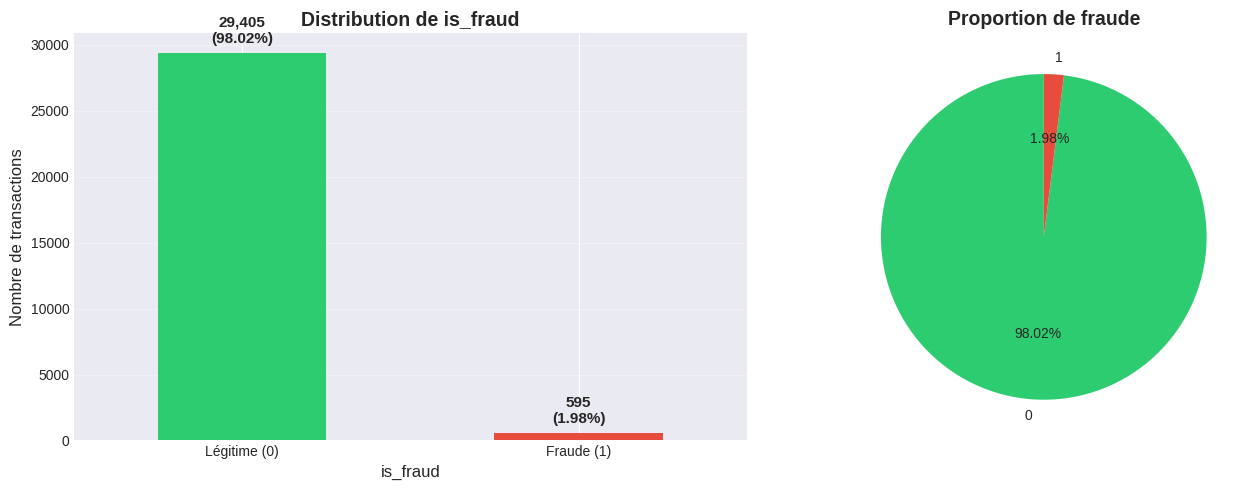

In [32]:
# Distribution de la variable cible
print("=" * 60)
print("🎯 ANALYSE DE LA VARIABLE CIBLE (is_fraud)")
print("=" * 60)

fraud_counts = train_df['is_fraud'].value_counts()
fraud_pct = train_df['is_fraud'].value_counts(normalize=True) * 100

print("\n📊 Distribution:")
print(f"   - Transactions légitimes (0): {fraud_counts[0]:,} ({fraud_pct[0]:.2f}%)")
print(f"   - Transactions frauduleuses (1): {fraud_counts[1]:,} ({fraud_pct[1]:.2f}%)")
print(f"\n⚠️  DÉSÉQUILIBRE CRITIQUE: Ratio de {fraud_counts[0]/fraud_counts[1]:.1f}:1")
print("   → Stratégie de gestion du déséquilibre nécessaire (SMOTE, class_weight, etc.)")

# Visualisation
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Graphique en barres
fraud_counts.plot(kind='bar', ax=axes[0], color=['#2ecc71', '#e74c3c'])
axes[0].set_title('Distribution de is_fraud', fontsize=14, fontweight='bold')
axes[0].set_xlabel('is_fraud', fontsize=12)
axes[0].set_ylabel('Nombre de transactions', fontsize=12)
axes[0].set_xticklabels(['Légitime (0)', 'Fraude (1)'], rotation=0)
axes[0].grid(axis='y', alpha=0.3)

# Ajout des valeurs sur les barres
for i, v in enumerate(fraud_counts):
    axes[0].text(i, v + 500, f'{v:,}\n({fraud_pct[i]:.2f}%)', 
                ha='center', va='bottom', fontsize=11, fontweight='bold')

# Graphique en camembert
fraud_pct.plot(kind='pie', ax=axes[1], autopct='%1.2f%%', 
               colors=['#2ecc71', '#e74c3c'], startangle=90)
axes[1].set_title('Proportion de fraude', fontsize=14, fontweight='bold')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()


**Note :** Ce bloc crée des visualisations pour comparer les distributions des variables numériques (step, amount, age) entre les transactions frauduleuses et légitimes. La première ligne montre des histogrammes superposés pour visualiser les différences de distribution. La deuxième ligne montre des boxplots qui permettent de voir les quartiles, médianes et valeurs aberrantes. Pour le montant (amount), une transformation logarithmique est utilisée car la distribution est très asymétrique. Ces visualisations aident à identifier quelles variables sont les plus discriminantes.


## 5. Analyse des variables numériques


**Note :** Ce bloc détecte les valeurs aberrantes (outliers) en utilisant la méthode IQR (Interquartile Range). Pour chaque variable numérique (amount, age), il calcule les quartiles Q1 et Q3, puis définit les limites comme Q1 - 1.5*IQR et Q3 + 1.5*IQR. Les valeurs en dehors de ces limites sont considérées comme aberrantes. Il affiche également combien de ces valeurs aberrantes sont des fraudes, ce qui peut être intéressant car certaines fraudes peuvent avoir des montants ou âges inhabituels.


In [33]:
# Analyse statistique par classe (fraude vs légitime)
print("=" * 60)
print("📈 STATISTIQUES PAR CLASSE (FRAUDE vs LÉGITIME)")
print("=" * 60)

numeric_cols = ['step', 'amount', 'age']
stats_by_fraud = train_df.groupby('is_fraud')[numeric_cols].agg(['mean', 'median', 'std', 'min', 'max'])
display(stats_by_fraud)


📈 STATISTIQUES PAR CLASSE (FRAUDE vs LÉGITIME)


step                           amount                             \
           mean median    std min  max      mean    median        std   min   
is_fraud                                                                      
0        360.88 360.00 207.97   0  719 140615.51  47500.00  376757.86   100   
1        373.79 380.00 203.65   1  718 486999.83 155000.00 1185774.12  1100   

                     age                       
               max  mean median   std min max  
is_fraud                                       
0         19214000 34.53  28.00 16.06  18  90  
1         16558000 33.72  27.00 16.53  18  88

**Note :** Ce bloc analyse la variable catégorielle 'type' qui indique le type de transaction (PAYMENT, TRANSFER, CASH_OUT, DEBIT). Il crée des tableaux croisés pour voir la distribution des fraudes par type de transaction, à la fois en comptage absolu et en pourcentage. Il calcule ensuite le taux de fraude pour chaque type de transaction. Cette analyse est importante car certains types de transactions peuvent être plus susceptibles de fraudes que d'autres.


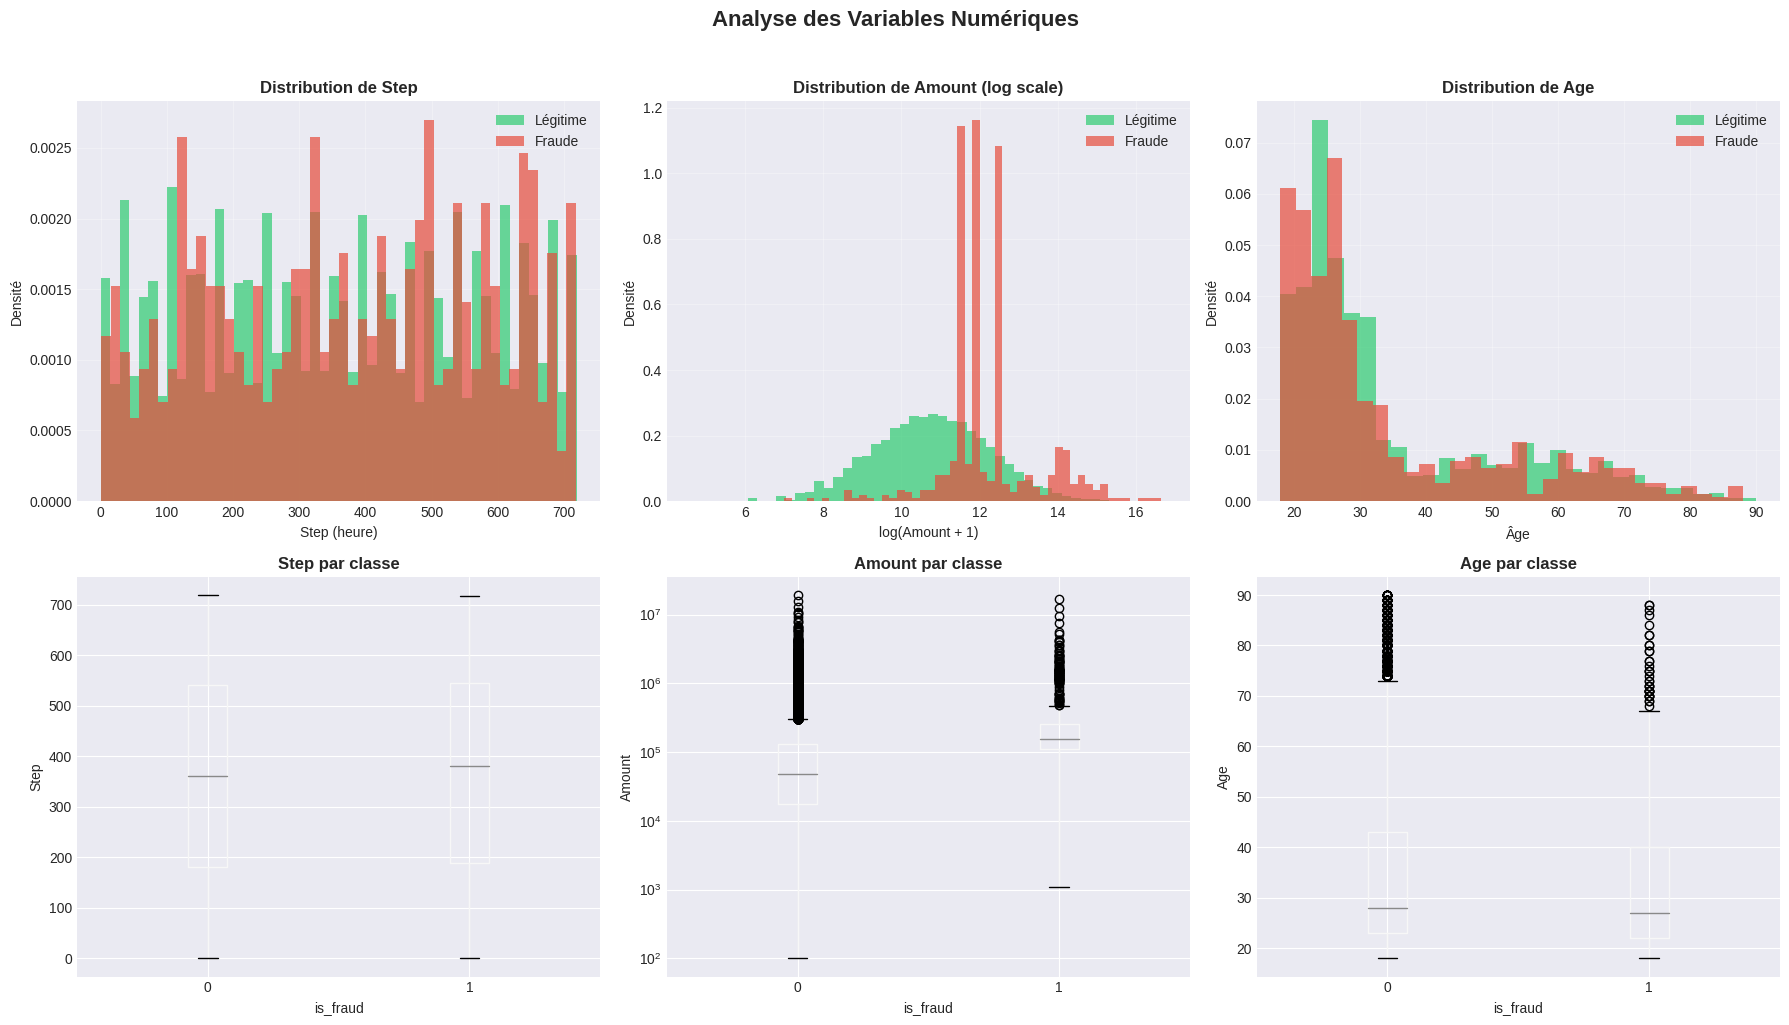

In [34]:
# Distribution des variables numériques
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Step
axes[0, 0].hist(train_df[train_df['is_fraud']==0]['step'], bins=50, alpha=0.7, 
                label='Légitime', color='#2ecc71', density=True)
axes[0, 0].hist(train_df[train_df['is_fraud']==1]['step'], bins=50, alpha=0.7, 
                label='Fraude', color='#e74c3c', density=True)
axes[0, 0].set_title('Distribution de Step', fontweight='bold')
axes[0, 0].set_xlabel('Step (heure)')
axes[0, 0].set_ylabel('Densité')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# Amount (échelle logarithmique pour meilleure visualisation)
axes[0, 1].hist(np.log1p(train_df[train_df['is_fraud']==0]['amount']), bins=50, alpha=0.7, 
                label='Légitime', color='#2ecc71', density=True)
axes[0, 1].hist(np.log1p(train_df[train_df['is_fraud']==1]['amount']), bins=50, alpha=0.7, 
                label='Fraude', color='#e74c3c', density=True)
axes[0, 1].set_title('Distribution de Amount (log scale)', fontweight='bold')
axes[0, 1].set_xlabel('log(Amount + 1)')
axes[0, 1].set_ylabel('Densité')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# Age
axes[0, 2].hist(train_df[train_df['is_fraud']==0]['age'], bins=30, alpha=0.7, 
                label='Légitime', color='#2ecc71', density=True)
axes[0, 2].hist(train_df[train_df['is_fraud']==1]['age'], bins=30, alpha=0.7, 
                label='Fraude', color='#e74c3c', density=True)
axes[0, 2].set_title('Distribution de Age', fontweight='bold')
axes[0, 2].set_xlabel('Âge')
axes[0, 2].set_ylabel('Densité')
axes[0, 2].legend()
axes[0, 2].grid(alpha=0.3)

# Boxplots
train_df.boxplot(column='step', by='is_fraud', ax=axes[1, 0])
axes[1, 0].set_title('Step par classe', fontweight='bold')
axes[1, 0].set_xlabel('is_fraud')
axes[1, 0].set_ylabel('Step')

train_df.boxplot(column='amount', by='is_fraud', ax=axes[1, 1])
axes[1, 1].set_title('Amount par classe', fontweight='bold')
axes[1, 1].set_xlabel('is_fraud')
axes[1, 1].set_ylabel('Amount')
axes[1, 1].set_yscale('log')

train_df.boxplot(column='age', by='is_fraud', ax=axes[1, 2])
axes[1, 2].set_title('Age par classe', fontweight='bold')
axes[1, 2].set_xlabel('is_fraud')
axes[1, 2].set_ylabel('Age')

plt.suptitle('Analyse des Variables Numériques', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


**Note :** Ce bloc crée deux graphiques en barres pour visualiser la variable 'type'. Le premier montre la distribution du nombre de transactions par type, permettant de voir quels types sont les plus fréquents. Le deuxième montre le taux de fraude pour chaque type de transaction, ce qui est crucial pour identifier quels types sont les plus à risque. Les valeurs sont affichées directement sur les barres pour faciliter la lecture.


In [35]:
# Détection des valeurs aberrantes (outliers)
print("=" * 60)
print("🔍 DÉTECTION DES VALEURS ABERRANTES")
print("=" * 60)

def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

for col in ['amount', 'age']:
    outliers, lower, upper = detect_outliers_iqr(train_df, col)
    print(f"\n{col.upper()}:")
    print(f"   - Limites IQR: [{lower:.2f}, {upper:.2f}]")
    print(f"   - Nombre d'outliers: {len(outliers)} ({len(outliers)/len(train_df)*100:.2f}%)")
    print(f"   - Outliers dans fraude: {outliers[outliers['is_fraud']==1].shape[0]} ({outliers[outliers['is_fraud']==1].shape[0]/len(outliers)*100:.2f}%)")


🔍 DÉTECTION DES VALEURS ABERRANTES

AMOUNT:
   - Limites IQR: [-160250.00, 313750.00]
   - Nombre d'outliers: 3079 (10.26%)
   - Outliers dans fraude: 111 (3.61%)

AGE:
   - Limites IQR: [-7.00, 73.00]
   - Nombre d'outliers: 867 (2.89%)
   - Outliers dans fraude: 18 (2.08%)


**Note :** Ce bloc convertit la variable 'step' (qui représente des heures depuis le début) en variables temporelles plus interprétables : jour de la semaine, heure de la journée, et numéro du jour. La conversion utilise le fait que Step 1 correspond au lundi 00h-01h. Il calcule ensuite le taux de fraude par jour de la semaine pour identifier s'il y a des jours plus à risque. Cette analyse temporelle est importante car les fraudes peuvent avoir des patterns temporels (par exemple, plus de fraudes la nuit ou le week-end).


## 6. Analyse des variables catégorielles


**Note :** Ce bloc crée quatre visualisations pour analyser les patterns temporels : (1) le taux de fraude par jour de la semaine (graphique en barres), (2) le taux de fraude par heure de la journée (graphique en ligne), (3) le volume de transactions par jour, et (4) le volume de transactions par heure. Ces graphiques permettent d'identifier les périodes à risque et de comprendre si le volume de transactions influence le taux de fraude.


In [36]:
# Analyse de la variable 'type'
print("=" * 60)
print("ANALYSE DE LA VARIABLE 'TYPE'")
print("=" * 60)

type_analysis = pd.crosstab(train_df['type'], train_df['is_fraud'], margins=True)
type_analysis_pct = pd.crosstab(train_df['type'], train_df['is_fraud'], normalize='index') * 100

print("\nTableau croise (comptage):")
display(type_analysis)

print("\nTableau croise (pourcentage par ligne):")
display(type_analysis_pct.round(2))

# Taux de fraude par type
fraud_rate_by_type = train_df.groupby('type')['is_fraud'].agg(['mean', 'count'])
fraud_rate_by_type.columns = ['Taux de fraude', 'Nombre de transactions']
fraud_rate_by_type['Taux de fraude (%)'] = fraud_rate_by_type['Taux de fraude'] * 100
fraud_rate_by_type = fraud_rate_by_type.sort_values('Taux de fraude', ascending=False)

print("\nTaux de fraude par type de transaction:")
display(fraud_rate_by_type)


ANALYSE DE LA VARIABLE 'TYPE'

Tableau croise (comptage):


is_fraud,0,1,All
type,,,
CASH_OUT,7695,21,7716
DEBIT,2954,20,2974
PAYMENT,11123,27,11150
TRANSFER,7633,527,8160
All,29405,595,30000



Tableau croise (pourcentage par ligne):


is_fraud,0,1
type,,
CASH_OUT,99.73,0.27
DEBIT,99.33,0.67
PAYMENT,99.76,0.24
TRANSFER,93.54,6.46



Taux de fraude par type de transaction:


,Taux de fraude,Nombre de transactions,Taux de fraude (%)
type,,,
TRANSFER,0.06,8160,6.46
DEBIT,0.01,2974,0.67
CASH_OUT,0.00,7716,0.27
PAYMENT,0.00,11150,0.24


**Note :** Ce bloc analyse les patterns des clients en calculant le nombre de transactions par client. Il identifie les clients avec plusieurs transactions et les clients frauduleux. Cette analyse peut révéler si certains clients sont plus à risque ou si les fraudes sont concentrées sur certains clients. Cependant, dans ce contexte, le customer_id n'est généralement pas utilisé directement comme feature car il s'agit d'un identifiant unique.


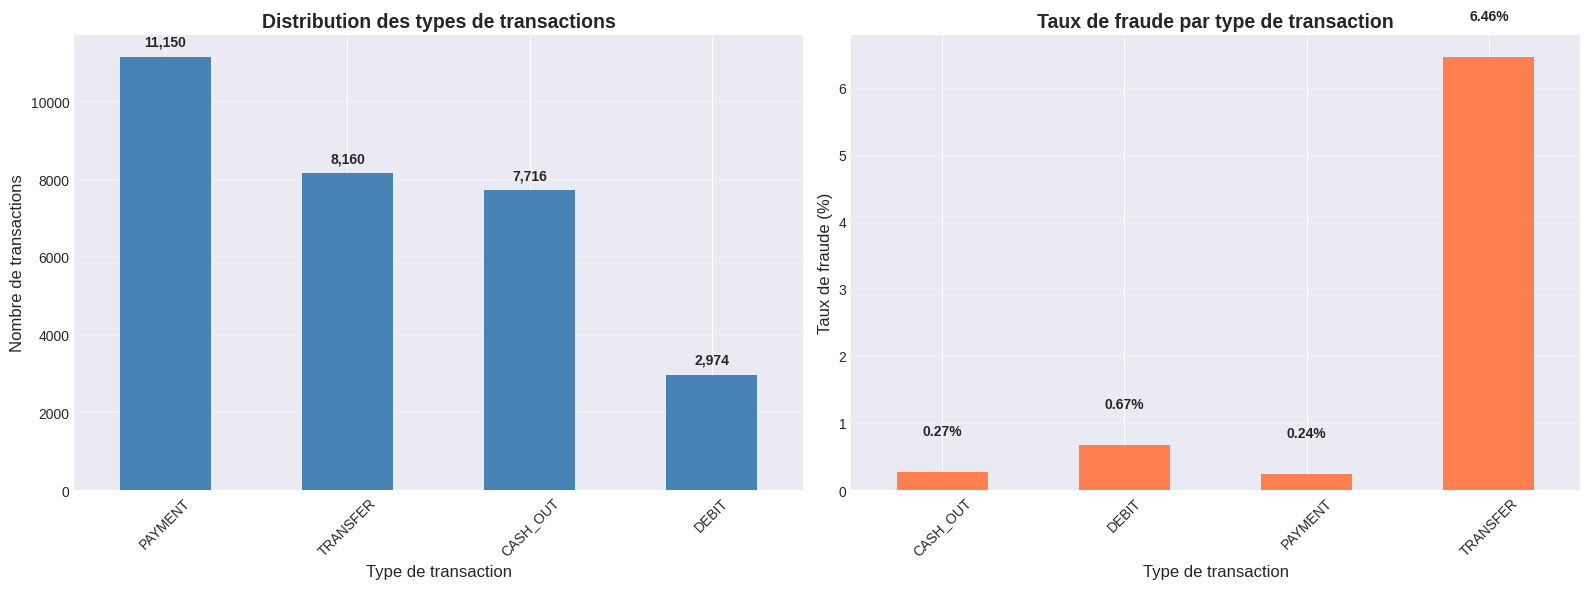

In [37]:
# Visualisation de la variable 'type'
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Graphique en barres - Distribution
type_counts = train_df['type'].value_counts()
type_counts.plot(kind='bar', ax=axes[0], color='steelblue')
axes[0].set_title('Distribution des types de transactions', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Type de transaction', fontsize=12)
axes[0].set_ylabel('Nombre de transactions', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', alpha=0.3)

# Ajout des valeurs
for i, v in enumerate(type_counts):
    axes[0].text(i, v + 200, f'{v:,}', ha='center', va='bottom', fontweight='bold')

# Graphique en barres - Taux de fraude par type
fraud_by_type = train_df.groupby('type')['is_fraud'].mean() * 100
fraud_by_type.plot(kind='bar', ax=axes[1], color='coral')
axes[1].set_title('Taux de fraude par type de transaction', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Type de transaction', fontsize=12)
axes[1].set_ylabel('Taux de fraude (%)', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', alpha=0.3)

# Ajout des valeurs
for i, v in enumerate(fraud_by_type):
    axes[1].text(i, v + 0.5, f'{v:.2f}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()


**Note :** Ce bloc calcule et visualise la matrice de corrélation entre les variables numériques. La corrélation mesure la relation linéaire entre deux variables (de -1 à +1). Une corrélation proche de 0 indique une faible relation linéaire, tandis qu'une corrélation proche de +1 ou -1 indique une forte relation. La heatmap permet de visualiser rapidement toutes les corrélations. Les corrélations avec la variable cible (is_fraud) sont particulièrement importantes car elles indiquent quelles variables sont les plus prédictives.


**Note :** Ce bloc définit une fonction `prepare_data` qui effectue le feature engineering basique. Elle crée : (1) des variables temporelles (jour de la semaine, heure, indicateurs pour week-end, nuit, heures de bureau), (2) des transformations du montant (log et racine carrée pour réduire l'asymétrie), et (3) des groupes d'âge. La fonction est ensuite appliquée aux datasets d'entraînement et de test pour créer de nouvelles features qui peuvent améliorer les performances du modèle.


## 7. Analyse temporelle (Step)


**Note :** Ce bloc encode les variables catégorielles pour qu'elles puissent être utilisées par les algorithmes de machine learning. Pour 'type', on utilise le One-Hot Encoding qui crée une colonne binaire (0/1) pour chaque catégorie. Pour 'age_group', on utilise le Label Encoding qui assigne un nombre à chaque catégorie. Il est important de s'assurer que les colonnes sont identiques entre train et test pour éviter les erreurs lors de la prédiction. Les colonnes encodées sont ensuite concaténées avec le reste des données.


In [38]:
# Conversion du step en variables temporelles
# Indice: Step 1 = première heure d'un LUNDI
print("=" * 60)
print("🕐 ANALYSE TEMPORELLE")
print("=" * 60)

# Création d'une copie pour l'analyse
df_temp = train_df.copy()

# Conversion step en jour de la semaine (0 = Lundi, 6 = Dimanche)
# Step 1 = Lundi 00h-01h, Step 24 = Mardi 00h-01h, etc.
df_temp['day_of_week'] = ((df_temp['step'] - 1) // 24) % 7
df_temp['hour_of_day'] = (df_temp['step'] - 1) % 24
df_temp['day_number'] = (df_temp['step'] - 1) // 24 + 1

# Noms des jours
days = ['Lundi', 'Mardi', 'Mercredi', 'Jeudi', 'Vendredi', 'Samedi', 'Dimanche']
df_temp['day_name'] = df_temp['day_of_week'].map(lambda x: days[x])

print(f"\n📅 Période couverte: {df_temp['day_number'].min()} à {df_temp['day_number'].max()} jours")
print(f"⏰ Heures: {df_temp['hour_of_day'].min()}h à {df_temp['hour_of_day'].max()}h")

# Taux de fraude par jour de la semaine
fraud_by_day = df_temp.groupby('day_name')['is_fraud'].agg(['mean', 'count'])
fraud_by_day.columns = ['Taux de fraude', 'Nombre']
fraud_by_day['Taux (%)'] = fraud_by_day['Taux de fraude'] * 100
fraud_by_day = fraud_by_day.reindex(days)

print("\n📊 Taux de fraude par jour de la semaine:")
display(fraud_by_day)


🕐 ANALYSE TEMPORELLE

📅 Période couverte: 0 à 30 jours
⏰ Heures: 0h à 23h

📊 Taux de fraude par jour de la semaine:


,Taux de fraude,Nombre,Taux (%)
day_name,,,
Lundi,0.02,5024,1.63
Mardi,0.02,4938,1.94
Mercredi,0.02,3908,1.61
Jeudi,0.02,4055,1.75
Vendredi,0.01,4065,1.48
Samedi,0.03,3966,2.67
Dimanche,0.03,4044,2.89


**Note :** Ce bloc sélectionne les features finales à utiliser pour l'entraînement du modèle. Il exclut les colonnes non pertinentes comme les identifiants (transaction_id, customer_id), les variables catégorielles originales qui ont été encodées (type, age_group), et la variable cible (is_fraud). Les datasets finaux X_train, y_train et X_test sont créés avec uniquement les features sélectionnées. Les types de données sont vérifiés pour s'assurer que tout est prêt pour la modélisation.


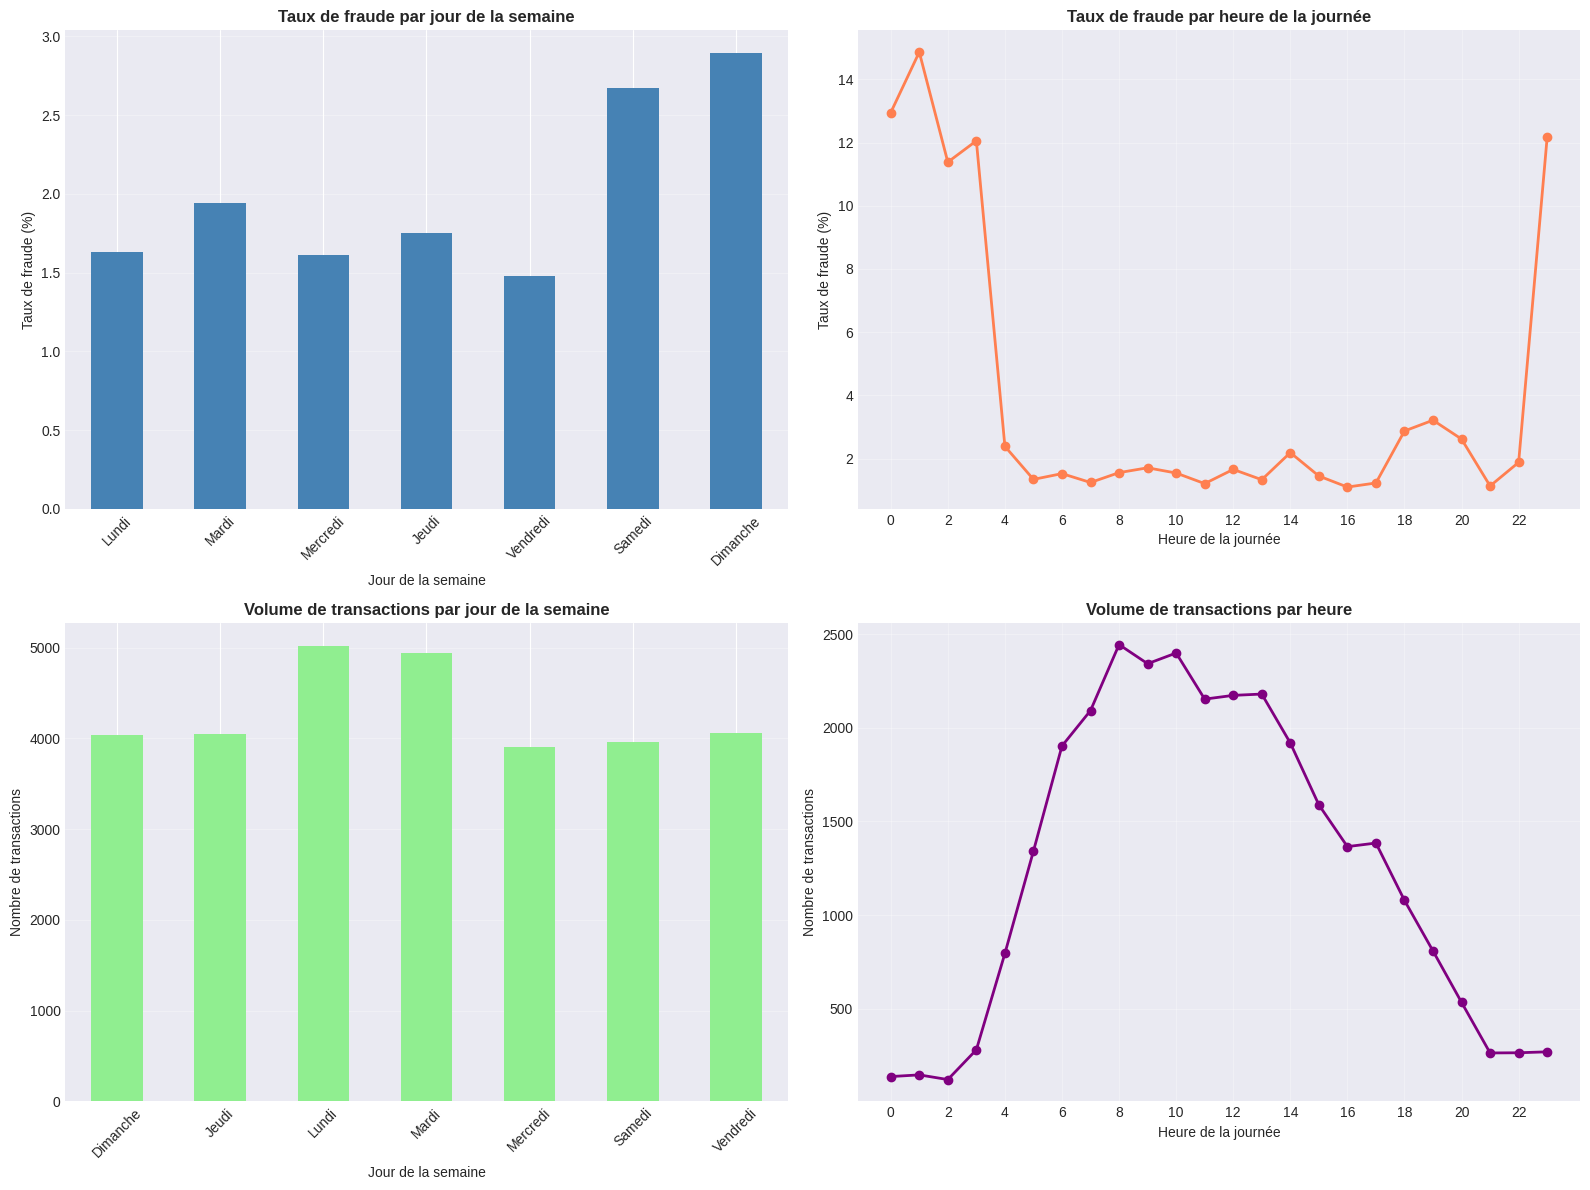

In [39]:
# Visualisation temporelle
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Fraude par jour de la semaine
fraud_by_day['Taux (%)'].plot(kind='bar', ax=axes[0, 0], color='steelblue')
axes[0, 0].set_title('Taux de fraude par jour de la semaine', fontweight='bold')
axes[0, 0].set_xlabel('Jour de la semaine')
axes[0, 0].set_ylabel('Taux de fraude (%)')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(axis='y', alpha=0.3)

# Fraude par heure de la journée
fraud_by_hour = df_temp.groupby('hour_of_day')['is_fraud'].mean() * 100
fraud_by_hour.plot(kind='line', ax=axes[0, 1], marker='o', color='coral', linewidth=2)
axes[0, 1].set_title('Taux de fraude par heure de la journée', fontweight='bold')
axes[0, 1].set_xlabel('Heure de la journée')
axes[0, 1].set_ylabel('Taux de fraude (%)')
axes[0, 1].grid(alpha=0.3)
axes[0, 1].set_xticks(range(0, 24, 2))

# Volume de transactions par jour
volume_by_day = df_temp.groupby('day_name').size()
volume_by_day.plot(kind='bar', ax=axes[1, 0], color='lightgreen')
axes[1, 0].set_title('Volume de transactions par jour de la semaine', fontweight='bold')
axes[1, 0].set_xlabel('Jour de la semaine')
axes[1, 0].set_ylabel('Nombre de transactions')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(axis='y', alpha=0.3)

# Volume de transactions par heure
volume_by_hour = df_temp.groupby('hour_of_day').size()
volume_by_hour.plot(kind='line', ax=axes[1, 1], marker='o', color='purple', linewidth=2)
axes[1, 1].set_title('Volume de transactions par heure', fontweight='bold')
axes[1, 1].set_xlabel('Heure de la journée')
axes[1, 1].set_ylabel('Nombre de transactions')
axes[1, 1].grid(alpha=0.3)
axes[1, 1].set_xticks(range(0, 24, 2))

plt.tight_layout()
plt.show()


**Note :** Ce bloc effectue une vérification finale avant de passer à la modélisation. Il vérifie qu'il n'y a pas de valeurs manquantes dans les datasets finaux, que les colonnes sont identiques entre train et test (essentiel pour éviter les erreurs lors de la prédiction), et affiche les statistiques finales. Les données préparées sont sauvegardées en CSV pour pouvoir être réutilisées plus tard sans refaire tout le preprocessing.


**Note :** Ce bloc analyse les patterns des clients en calculant le nombre de transactions par client. Il identifie les clients avec plusieurs transactions et les clients frauduleux. Cette analyse peut révéler si certains clients sont plus à risque ou si les fraudes sont concentrées sur certains clients. Cependant, dans ce contexte, le customer_id n'est généralement pas utilisé directement comme feature car il s'agit d'un identifiant unique.


## 8. Analyse des clients (customer_id)


**Note :** Ce bloc calcule et visualise la matrice de corrélation entre les variables numériques. La corrélation mesure la relation linéaire entre deux variables (de -1 à +1). Une corrélation proche de 0 indique une faible relation linéaire, tandis qu'une corrélation proche de +1 ou -1 indique une forte relation. La heatmap permet de visualiser rapidement toutes les corrélations. Les corrélations avec la variable cible (is_fraud) sont particulièrement importantes car elles indiquent quelles variables sont les plus prédictives.


In [40]:
# Analyse des patterns clients
print("=" * 60)
print("👥 ANALYSE DES CLIENTS")
print("=" * 60)

# Nombre de transactions par client
transactions_per_customer = train_df.groupby('customer_id').size()
print(f"\n📊 Statistiques sur les transactions par client:")
print(f"   - Nombre de clients uniques: {train_df['customer_id'].nunique():,}")
print(f"   - Nombre moyen de transactions par client: {transactions_per_customer.mean():.2f}")
print(f"   - Médiane: {transactions_per_customer.median():.2f}")
print(f"   - Max: {transactions_per_customer.max()}")
print(f"   - Min: {transactions_per_customer.min()}")

# Clients avec transactions multiples
multi_transaction_customers = transactions_per_customer[transactions_per_customer > 1]
print(f"\n🔍 Clients avec transactions multiples: {len(multi_transaction_customers):,} ({len(multi_transaction_customers)/train_df['customer_id'].nunique()*100:.2f}%)")

# Clients frauduleux
fraudulent_customers = train_df[train_df['is_fraud']==1]['customer_id'].unique()
print(f"\n⚠️  Clients ayant commis au moins une fraude: {len(fraudulent_customers):,}")

# Clients avec plusieurs fraudes
customer_fraud_count = train_df[train_df['is_fraud']==1].groupby('customer_id').size()
repeat_fraud_customers = customer_fraud_count[customer_fraud_count > 1]
print(f"   - Clients avec fraudes multiples: {len(repeat_fraud_customers):,}")
if len(repeat_fraud_customers) > 0:
    print(f"   - Max fraudes par client: {repeat_fraud_customers.max()}")


👥 ANALYSE DES CLIENTS

📊 Statistiques sur les transactions par client:
   - Nombre de clients uniques: 29,997
   - Nombre moyen de transactions par client: 1.00
   - Médiane: 1.00
   - Max: 2
   - Min: 1

🔍 Clients avec transactions multiples: 3 (0.01%)

⚠️  Clients ayant commis au moins une fraude: 595
   - Clients avec fraudes multiples: 0


**Note :** Ce bloc définit une fonction `prepare_data` qui effectue le feature engineering basique. Elle crée : (1) des variables temporelles (jour de la semaine, heure, indicateurs pour week-end, nuit, heures de bureau), (2) des transformations du montant (log et racine carrée pour réduire l'asymétrie), et (3) des groupes d'âge. La fonction est ensuite appliquée aux datasets d'entraînement et de test pour créer de nouvelles features qui peuvent améliorer les performances du modèle.


## 9. Matrice de corrélation


🔗 MATRICE DE CORRÉLATION


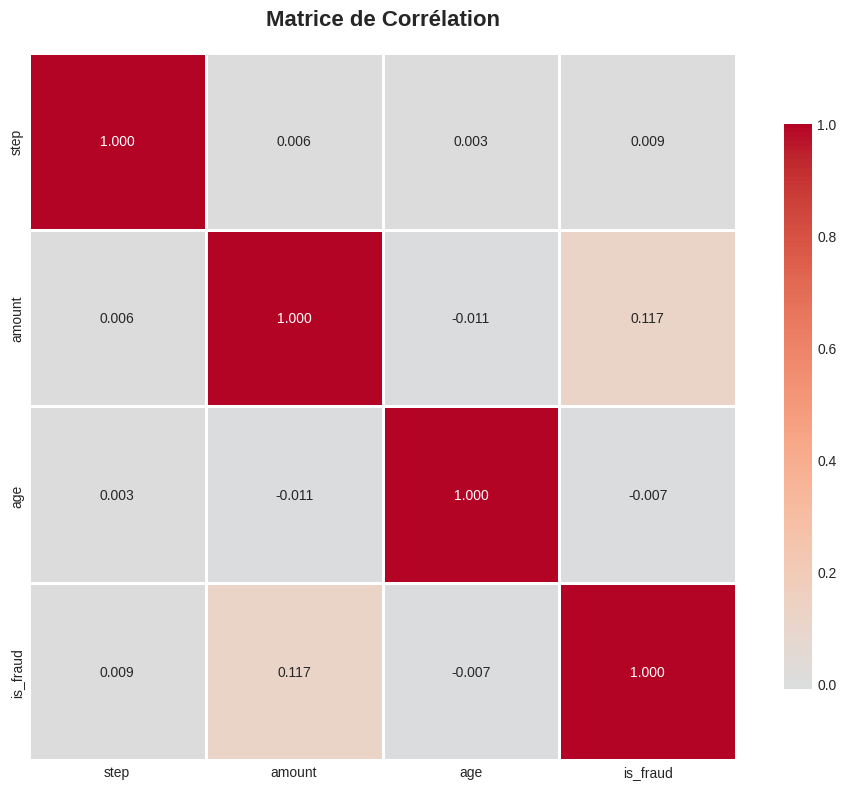


📊 Corrélations avec is_fraud:


is_fraud    1.00
amount      0.12
step        0.01
age        -0.01
Name: is_fraud, dtype: float64

In [41]:
# Matrice de corrélation pour les variables numériques
print("=" * 60)
print("🔗 MATRICE DE CORRÉLATION")
print("=" * 60)

corr_matrix = train_df[['step', 'amount', 'age', 'is_fraud']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.3f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matrice de Corrélation', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\n📊 Corrélations avec is_fraud:")
corr_with_target = corr_matrix['is_fraud'].sort_values(ascending=False)
display(corr_with_target)


**Note :** Ce bloc encode les variables catégorielles pour qu'elles puissent être utilisées par les algorithmes de machine learning. Pour 'type', on utilise le One-Hot Encoding qui crée une colonne binaire (0/1) pour chaque catégorie. Pour 'age_group', on utilise le Label Encoding qui assigne un nombre à chaque catégorie. Il est important de s'assurer que les colonnes sont identiques entre train et test pour éviter les erreurs lors de la prédiction. Les colonnes encodées sont ensuite concaténées avec le reste des données.


## 10. Préparation des données

### 10.1 Feature Engineering basique


**Note :** Ce bloc sélectionne les features finales à utiliser pour l'entraînement du modèle. Il exclut les colonnes non pertinentes comme les identifiants (transaction_id, customer_id), les variables catégorielles originales qui ont été encodées (type, age_group), et la variable cible (is_fraud). Les datasets finaux X_train, y_train et X_test sont créés avec uniquement les features sélectionnées. Les types de données sont vérifiés pour s'assurer que tout est prêt pour la modélisation.


In [42]:
# Création d'une fonction de préparation des données
def prepare_data(df, is_train=True):
    """
    Fonction pour préparer les données avec feature engineering basique
    
    Parameters:
    -----------
    df : DataFrame
        DataFrame à préparer
    is_train : bool
        Indique si c'est le train set (contient is_fraud) ou le test set
    
    Returns:
    --------
    DataFrame préparé
    """
    df_prep = df.copy()
    
    # 1. Variables temporelles (Step 1 = Lundi 00h-01h)
    df_prep['day_of_week'] = ((df_prep['step'] - 1) // 24) % 7
    df_prep['hour_of_day'] = (df_prep['step'] - 1) % 24
    df_prep['is_weekend'] = (df_prep['day_of_week'] >= 5).astype(int)
    df_prep['is_night'] = ((df_prep['hour_of_day'] >= 22) | (df_prep['hour_of_day'] < 6)).astype(int)
    df_prep['is_business_hours'] = ((df_prep['hour_of_day'] >= 9) & (df_prep['hour_of_day'] < 18)).astype(int)
    
    # 2. Variables sur le montant
    df_prep['amount_log'] = np.log1p(df_prep['amount'])  # Log transform pour réduire la skewness
    df_prep['amount_sqrt'] = np.sqrt(df_prep['amount'])
    
    # 3. Variables sur l'âge
    df_prep['age_group'] = pd.cut(df_prep['age'], 
                                   bins=[0, 25, 35, 50, 100], 
                                   labels=['Jeune', 'Adulte', 'Mature', 'Senior'],
                                   include_lowest=True)
    
    # 4. Encodage de la variable 'type' (One-Hot Encoding sera fait plus tard)
    # Pour l'instant, on garde la variable originale
    
    # 5. Suppression des colonnes non nécessaires pour le modèle
    # On garde transaction_id pour la soumission finale
    columns_to_drop = ['customer_id']  # ID client non utilisé pour le modèle
    if 'transaction_id' in df_prep.columns and is_train:
        # On garde transaction_id dans le train pour référence, mais on le droppera avant l'entraînement
        pass
    
    return df_prep

# Application sur le train set
print("=" * 60)
print("🔧 PRÉPARATION DES DONNÉES")
print("=" * 60)

train_prep = prepare_data(train_df, is_train=True)
test_prep = prepare_data(test_df, is_train=False)

print(f"\n✅ Train set préparé: {train_prep.shape}")
print(f"✅ Test set préparé: {test_prep.shape}")

print(f"\n📋 Nouvelles colonnes créées:")
new_cols = [col for col in train_prep.columns if col not in train_df.columns]
print(f"   {new_cols}")

display(train_prep.head())


🔧 PRÉPARATION DES DONNÉES

✅ Train set préparé: (30000, 15)
✅ Test set préparé: (10000, 14)

📋 Nouvelles colonnes créées:
   ['day_of_week', 'hour_of_day', 'is_weekend', 'is_night', 'is_business_hours', 'amount_log', 'amount_sqrt', 'age_group']


,transaction_id,step,type,amount,customer_id,age,is_fraud,day_of_week,hour_of_day,is_weekend,is_night,is_business_hours,amount_log,amount_sqrt,age_group
0,38d8cd1a-ab64-48a8-982b-547db096f8a5,421,PAYMENT,311000,C13646530,24,0,3,12,0,0,1,12.65,557.67,Jeune
1,2440928e-8a4c-4e74-a9c5-6329668be13d,325,PAYMENT,399600,C9452763,25,0,6,12,1,0,1,12.90,632.14,Jeune
2,973c2a3c-5676-477c-ac30-81334b01e90d,565,PAYMENT,7500,C31260354,38,0,2,12,0,0,1,8.92,86.60,Mature
3,5413d0f4-b4f0-406f-bd91-91de1dce573c,511,TRANSFER,94000,C8841991,26,0,0,6,0,0,0,11.45,306.59,Adulte
4,c9fa99e2-42c8-4dd8-94ba-aa3e44bfdd98,63,CASH_OUT,15000,C3176716,26,0,2,14,0,0,1,9.62,122.47,Adulte


**Note :** Ce bloc effectue une vérification finale avant de passer à la modélisation. Il vérifie qu'il n'y a pas de valeurs manquantes dans les datasets finaux, que les colonnes sont identiques entre train et test (essentiel pour éviter les erreurs lors de la prédiction), et affiche les statistiques finales. Les données préparées sont sauvegardées en CSV pour pouvoir être réutilisées plus tard sans refaire tout le preprocessing.


**Note :** Ce bloc final résume tous les insights clés découverts lors de l'EDA et de la préparation des données. Il présente le déséquilibre des classes, l'importance des types de transactions, les patterns temporels, les transformations nécessaires pour les montants, et le statut de la préparation. Il liste également les prochaines étapes à suivre pour la modélisation. Ce résumé est essentiel pour documenter le travail effectué et guider les prochaines étapes du projet.


In [43]:
# One-Hot Encoding pour 'type' et 'age_group'
from sklearn.preprocessing import LabelEncoder

# Pour 'type' - One-Hot Encoding (meilleur pour les modèles linéaires)
type_dummies_train = pd.get_dummies(train_prep['type'], prefix='type')
type_dummies_test = pd.get_dummies(test_prep['type'], prefix='type')

# S'assurer que les colonnes sont les mêmes dans train et test
all_type_cols = set(type_dummies_train.columns) | set(type_dummies_test.columns)
for col in all_type_cols:
    if col not in type_dummies_train.columns:
        type_dummies_train[col] = 0
    if col not in type_dummies_test.columns:
        type_dummies_test[col] = 0

type_dummies_train = type_dummies_train[sorted(all_type_cols)]
type_dummies_test = type_dummies_test[sorted(all_type_cols)]

# Pour 'age_group' - Label Encoding (ou One-Hot selon le modèle)
le_age = LabelEncoder()
train_prep['age_group_encoded'] = le_age.fit_transform(train_prep['age_group'].astype(str))
test_prep['age_group_encoded'] = le_age.transform(test_prep['age_group'].astype(str))

# Concaténation
train_encoded = pd.concat([train_prep, type_dummies_train], axis=1)
test_encoded = pd.concat([test_prep, type_dummies_test], axis=1)

print("✅ Encodage terminé")
print(f"\n📊 Colonnes après encodage: {train_encoded.shape[1]}")
print(f"   Colonnes catégorielles encodées: {list(type_dummies_train.columns)} + age_group_encoded")


✅ Encodage terminé

📊 Colonnes après encodage: 20
   Colonnes catégorielles encodées: ['type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER'] + age_group_encoded


### 10.3 Sélection des features pour le modèle


In [44]:
# Définition des features à utiliser pour le modèle
# On exclut les colonnes non pertinentes
features_to_exclude = [
    'transaction_id',  # ID unique, non prédictif
    'customer_id',     # ID client, non prédictif (déjà exclu)
    'type',            # Déjà encodé en one-hot
    'age_group',       # Déjà encodé
    'is_fraud'         # Variable cible
]

# Features numériques et encodées
feature_columns = [col for col in train_encoded.columns 
                   if col not in features_to_exclude]

print("=" * 60)
print("🎯 FEATURES SÉLECTIONNÉES POUR LE MODÈLE")
print("=" * 60)
print(f"\n📊 Nombre de features: {len(feature_columns)}")
print(f"\n📋 Liste des features:")
for i, feat in enumerate(feature_columns, 1):
    print(f"   {i:2d}. {feat}")

# Préparation des datasets finaux
X_train = train_encoded[feature_columns].copy()
y_train = train_encoded['is_fraud'].copy()
X_test = test_encoded[feature_columns].copy()

print(f"\n✅ Datasets finaux préparés:")
print(f"   - X_train: {X_train.shape}")
print(f"   - y_train: {y_train.shape}")
print(f"   - X_test: {X_test.shape}")

# Vérification des types de données
print(f"\n📊 Types de données des features:")
print(X_train.dtypes.value_counts())


🎯 FEATURES SÉLECTIONNÉES POUR LE MODÈLE

📊 Nombre de features: 15

📋 Liste des features:
    1. step
    2. amount
    3. age
    4. day_of_week
    5. hour_of_day
    6. is_weekend
    7. is_night
    8. is_business_hours
    9. amount_log
   10. amount_sqrt
   11. age_group_encoded
   12. type_CASH_OUT
   13. type_DEBIT
   14. type_PAYMENT
   15. type_TRANSFER

✅ Datasets finaux préparés:
   - X_train: (30000, 15)
   - y_train: (30000,)
   - X_test: (10000, 15)

📊 Types de données des features:
int64      9
bool       4
float64    2
Name: count, dtype: int64


### 10.4 Vérification finale et sauvegarde


In [46]:
# Vérification finale
print("=" * 60)
print("✅ VÉRIFICATION FINALE")
print("=" * 60)

# Vérifier qu'il n'y a pas de valeurs manquantes
print("\n🔍 Valeurs manquantes:")
missing_train = X_train.isnull().sum().sum()
missing_test = X_test.isnull().sum().sum()
print(f"   - X_train: {missing_train} valeurs manquantes")
print(f"   - X_test: {missing_test} valeurs manquantes")

if missing_train == 0 and missing_test == 0:
    print("   ✅ Aucune valeur manquante !")
else:
    print("   ⚠️  Des valeurs manquantes détectées, traitement nécessaire")

# Vérifier que les colonnes sont identiques
print(f"\n🔍 Cohérence train/test:")
if list(X_train.columns) == list(X_test.columns):
    print("   ✅ Les colonnes sont identiques entre train et test")
else:
    print("   ⚠️  Différences détectées dans les colonnes")

# Statistiques finales
print(f"\n📊 Statistiques finales:")
print(f"   - Train: {X_train.shape[0]:,} échantillons, {X_train.shape[1]} features")
print(f"   - Test: {X_test.shape[0]:,} échantillons, {X_test.shape[1]} features")
print(f"   - Distribution cible: {y_train.value_counts().to_dict()}")

# Sauvegarde des données préparées (optionnel)
train_prep.to_csv('ressources/train_prepared.csv', index=False)
test_prep.to_csv('ressources/test_prepared.csv', index=False)
print("\n💾 Données préparées sauvegardées (commenté)")


✅ VÉRIFICATION FINALE

🔍 Valeurs manquantes:
   - X_train: 0 valeurs manquantes
   - X_test: 0 valeurs manquantes
   ✅ Aucune valeur manquante !

🔍 Cohérence train/test:
   ✅ Les colonnes sont identiques entre train et test

📊 Statistiques finales:
   - Train: 30,000 échantillons, 15 features
   - Test: 10,000 échantillons, 15 features
   - Distribution cible: {0: 29405, 1: 595}

💾 Données préparées sauvegardées (commenté)


## 11. Résumé et insights clés

### Insights de l'EDA


In [ ]:
print("=" * 60)
print("RESUME ET INSIGHTS CLES")
print("=" * 60)

insights = {
    "Déséquilibre des classes": {
        "Description": f"Ratio {fraud_counts[0]/fraud_counts[1]:.1f}:1 (Légitime:Fraude)",
        "Impact": "Nécessite des techniques de gestion du déséquilibre (SMOTE, class_weight, etc.)",
        "Taux de fraude": f"{fraud_pct[1]:.2f}%"
    },
    "Types de transactions": {
        "Description": "Certains types de transactions ont un taux de fraude plus élevé",
        "Recommandation": "La variable 'type' est importante pour la prédiction"
    },
    "Variables temporelles": {
        "Description": "Les fraudes peuvent varier selon le jour de la semaine et l'heure",
        "Recommandation": "Les features temporelles (day_of_week, hour_of_day, is_weekend, is_night) sont créées"
    },
    "Montants": {
        "Description": "Distribution très asymétrique (skewed)",
        "Recommandation": "Utilisation de log transform (amount_log) pour normaliser"
    },
    "Préparation": {
        "Features créées": len(new_cols),
        "Features finales": len(feature_columns),
        "Status": "Donnees pretes pour la modelisation"
    }
}

for key, value in insights.items():
    print(f"\n{key}:")
    if isinstance(value, dict):
        for k, v in value.items():
            print(f"   - {k}: {v}")
    else:
        print(f"   {value}")

print("\n" + "=" * 60)
print("EDA ET PREPARATION TERMINEES")
print("=" * 60)
print("\nProchaines etapes:")
print("   1. Baseline: Regression Logistique")
print("   2. Modeles avances (Random Forest, XGBoost, etc.)")
print("   3. Hyperparameter tuning")
print("   4. Gestion du desequilibre (SMOTE)")
print("   5. Generation de submission.csv")


📝 RÉSUMÉ ET INSIGHTS CLÉS

🔑 Déséquilibre des classes:
   - Description: Ratio 49.4:1 (Légitime:Fraude)
   - Impact: Nécessite des techniques de gestion du déséquilibre (SMOTE, class_weight, etc.)
   - Taux de fraude: 1.98%

🔑 Types de transactions:
   - Description: Certains types de transactions ont un taux de fraude plus élevé
   - Recommandation: La variable 'type' est importante pour la prédiction

🔑 Variables temporelles:
   - Description: Les fraudes peuvent varier selon le jour de la semaine et l'heure
   - Recommandation: Les features temporelles (day_of_week, hour_of_day, is_weekend, is_night) sont créées

🔑 Montants:
   - Description: Distribution très asymétrique (skewed)
   - Recommandation: Utilisation de log transform (amount_log) pour normaliser

🔑 Préparation:
   - Features créées: 8
   - Features finales: 15
   - Status: ✅ Données prêtes pour la modélisation

✅ EDA ET PRÉPARATION TERMINÉES

📌 Prochaines étapes:
   1. Baseline: Régression Logistique
   2. Modèles avanc